In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [149]:
X1 = np.random.multivariate_normal([3, 5], [[1, 0.1], [0.1, 1]], 1000)

In [150]:
X2 = np.random.multivariate_normal([12, 3], [[12, 0.1], [0.1, 1]], 1000)

In [151]:
X3 = np.random.multivariate_normal([6, 6], [[12, 8], [8, 12]], 1000)

In [152]:
X = np.concatenate((X1, X2, X3))

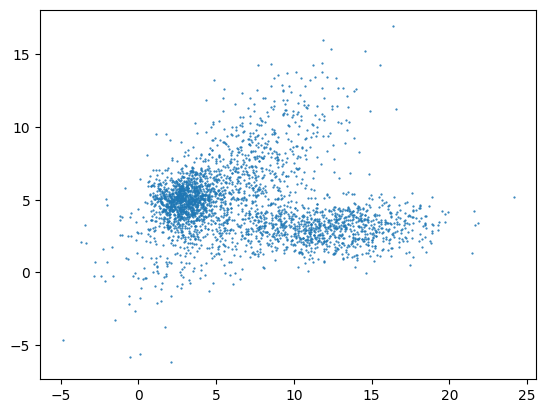

In [203]:
plt.scatter(X[:, 0], X[:, 1], s=0.3)

In [220]:
# E-M algorithm
import numpy as np

e_m_steps = 5
n_clusters = 2
prior = np.ones(n_clusters) / n_clusters

# Init clusters
clusters = {}
x_extent = X[:, 0].min(), X[:, 0].max()
y_extent = X[:, 1].min(), X[:, 1].max()
for i in range(n_clusters):
    mu_x, mu_y = np.random.random(2)
    mu_x = (x_extent[1] - x_extent[0]) * mu_x + x_extent[0]
    mu_y = (y_extent[1] - y_extent[0]) * mu_y + y_extent[0]
    cov = np.array([[1, 0], [0, 1]])
    clusters.update({i: (np.array([mu_x, mu_y]), cov)})


# For visualizing clusters
grid_num = 101
im = np.ones((grid_num, grid_num, e_m_steps, n_clusters))
N, d = X.shape

In [221]:
for i in range(e_m_steps):
    densities = np.zeros((N, len(clusters)))
    # E-step
    for ic, cluster in clusters.items():
        print(f"Cluster {ic}: {cluster}")
        mu, cov = cluster

        # Visualize cluster
        xs = np.linspace(*x_extent, grid_num)
        ys = np.linspace(*y_extent, grid_num)
        xx, yy = np.meshgrid(xs, ys)
        mg = np.dstack((xx, yy))
        densities_vis = multivariate_normal.pdf(mg, mu, cov)
        im[:, :, i, ic] = densities_vis / densities_vis.max()
        
        # Forward probabilities (E)
        densities[:, ic] = multivariate_normal.pdf(X, mu, cov) # Probability x_i given cluster a

    # M-step
    norm = (densities * prior.T).sum(axis=1)
    for ic, cluster in clusters.items():
        mu, cov = cluster
        # Posterior probabilities
        posterior = (densities[:, ic] * prior[ic]) / norm # Probability cluster a given x_i

        mu = (np.expand_dims(posterior, 1) * X).sum(axis=0) / posterior.sum()
        x_diff = X - mu
        t = posterior / (N * prior[ic])
        cov = (np.expand_dims(t, 1) * x_diff).T @ x_diff + np.eye(d) * 1e-6

        clusters[ic] = (mu, cov)

Cluster 0: (array([21.76382414, -6.02351573]), array([[1, 0],
       [0, 1]]))
Cluster 1: (array([17.56218398, 16.01977891]), array([[1, 0],
       [0, 1]]))
Cluster 0: (array([11.32594234,  2.20885901]), array([[11.70894117,  2.2733413 ],
       [ 2.2733413 ,  0.89785619]]))
Cluster 1: (array([5.35785777, 5.48670591]), array([[18.08807635,  3.47257454],
       [ 3.47257454,  6.96673531]]))
Cluster 0: (array([12.31893862,  2.67330204]), array([[6.79472789, 0.99221192],
       [0.99221192, 0.55234776]]))
Cluster 1: (array([4.96906958, 5.34279657]), array([[15.73740475,  4.86309994],
       [ 4.86309994,  8.6616391 ]]))
Cluster 0: (array([12.67780484,  2.86400365]), array([[5.00359025, 0.45072483],
       [0.45072483, 0.4599227 ]]))
Cluster 1: (array([4.77285923, 5.2965848 ]), array([[13.87839965,  5.37059987],
       [ 5.37059987,  9.18483676]]))
Cluster 0: (array([12.75160238,  2.93615239]), array([[4.68462752, 0.2993189 ],
       [0.2993189 , 0.47068702]]))
Cluster 1: (array([4.687613

In [222]:
densities

array([[3.29724817e-06, 1.41927065e-02],
       [7.28252344e-06, 1.33122941e-02],
       [2.10108248e-14, 1.32672732e-02],
       ...,
       [1.79999003e-10, 3.12337788e-03],
       [5.53249762e-07, 1.51459119e-02],
       [6.42146099e-12, 1.56867785e-02]])

In [223]:
(densities * prior.T).sum(axis=1)

array([0.007098  , 0.00665979, 0.00663364, ..., 0.00156169, 0.00757323,
       0.00784339])

In [224]:
densities

array([[3.29724817e-06, 1.41927065e-02],
       [7.28252344e-06, 1.33122941e-02],
       [2.10108248e-14, 1.32672732e-02],
       ...,
       [1.79999003e-10, 3.12337788e-03],
       [5.53249762e-07, 1.51459119e-02],
       [6.42146099e-12, 1.56867785e-02]])

In [225]:
mu

array([4.64208875, 5.29068162])

In [226]:
print(cov_b)

[[14.91449734  0.23259146]
 [ 0.23259146  1.07431921]]


TypeError: Invalid shape (101, 101, 2) for image data

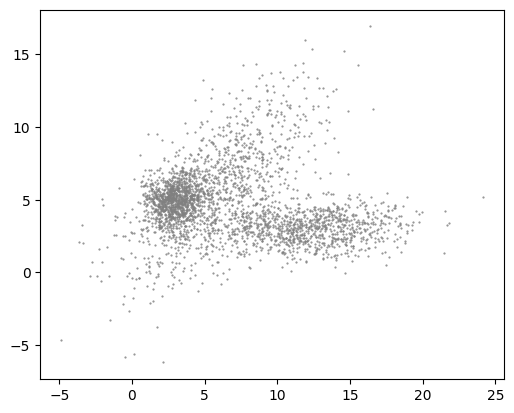

In [219]:
for i in range(e_m_steps):
    plt.scatter(X[:, 0], X[:, 1], c='gray', s=0.3,  alpha=0.9)
    plt.imshow(im[:, :, i, :]/im[:,:,i,:].max(), extent=(*x_extent, *y_extent), origin='lower')
    plt.xlim(*x_extent)
    plt.ylim(*y_extent)
    plt.savefig(f"e_m_{i}.png")

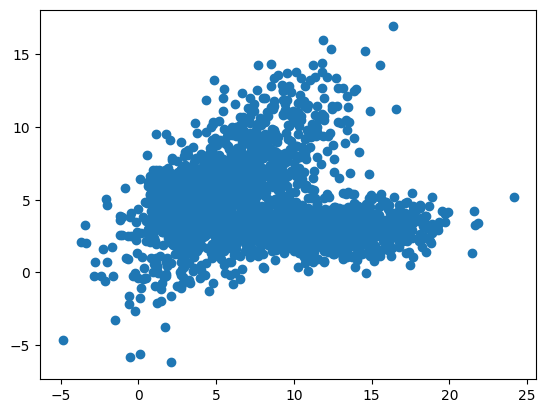

In [174]:
plt.scatter(X[:,0],X[:,1])